## 📌 Concept Recap

- **2D Convolution** = Filtering operation where an image is convolved with a kernel (filter).

- **Low-pass filters (LPF)** help in:
  - Removing noise.
  - Blurring the image.

- **High-pass filters (HPF)** help in:
  - Detecting edges.
  - Highlighting fine details.


## 🛠️ Custom Filtering with cv.filter2D()
➕ Averaging Filter (5x5)

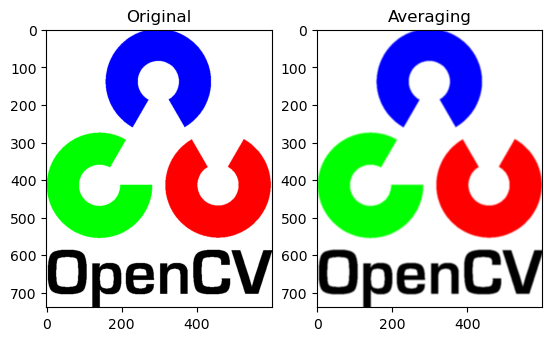

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('Image/OpenCV_Logo_with_text.png')
assert img is not None, "Image not found!"

# 5x5 averaging kernel
kernel = np.ones((5,5), np.float32) / 25
dst = cv.filter2D(img, -1, kernel)

# Display
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(dst), plt.title('Averaging')
plt.show()


✅ **Explanation:** The kernel slides over the image. For each central pixel, it replaces it with the **average of all 25 surrounding pixels.**

## 🧼 Image Blurring Techniques in OpenCV
Blurring is used for **noise reduction** and **smoothing**. OpenCV provides 4 major blurring techniques:

### 1️⃣ Averaging (Normalized Box Filter)

- **Functions**: `cv.blur()` or `cv.boxFilter()`

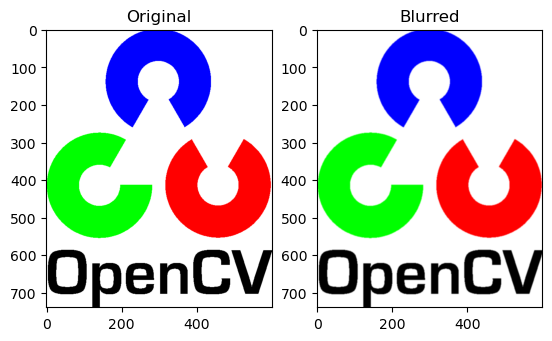

In [4]:
blur = cv.blur(img, (3,3))  # or use cv.boxFilter(img, -1, (5,5), normalize=True)
# Display
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(blur), plt.title('Blurred')
plt.show()

📌 Note: Use `cv.boxFilter(..., normalize=False)` to disable normalization.

 ### 2️⃣ Gaussian Blurring

- **Function**: `cv.GaussianBlur()`
   

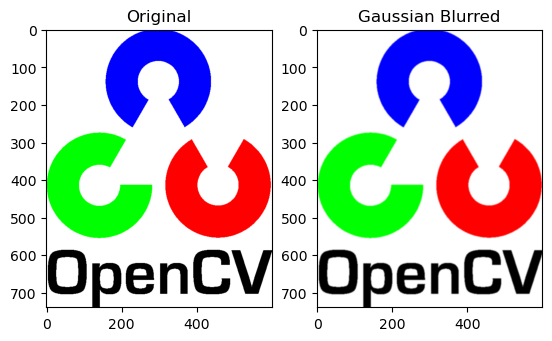

In [6]:
blur = cv.GaussianBlur(img, (5,5), 0)  # sigmaX = 0
# Display
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(blur), plt.title('Gaussian Blurred')
plt.show()

- Uses a **Gaussian kernel** instead of a box filter.
- Useful for removing **Gaussian noise**.
- Optional: Create a custom kernel using `cv.getGaussianKernel()`.

### 3️⃣ Median Blurring

- **Function**: `cv.medianBlur()`

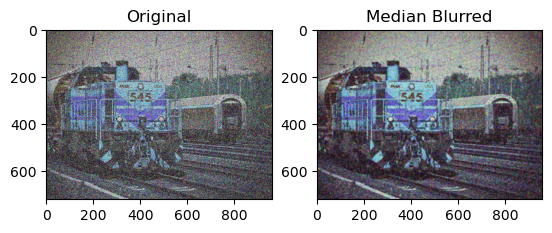

In [9]:
# Median Blurring
img = cv.imread('Image/salt_and_peper_image.jpg')
assert img is not None, "Image not found!"
median = cv.medianBlur(img, 5)

# Display
plt.subplot(121), plt.imshow(img), plt.title('Original')
plt.subplot(122), plt.imshow(median), plt.title('Median Blurred')
plt.show()

- Takes the **median** of all pixels under the kernel area.
- Very effective for **salt-and-pepper noise**.
- Kernel size must be a **positive odd integer**.


### 4️⃣ Bilateral Filtering

- **Function**: `cv.bilateralFilter()`

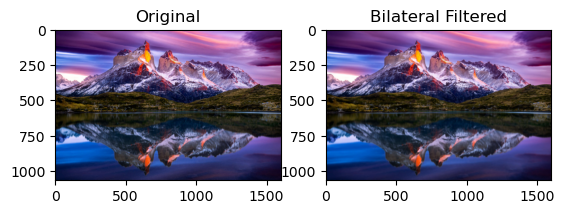

In [12]:
img = cv.imread('Image/high_res_image.jpg')
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
assert rgb_img is not None, "Image not found!"

# Bilateral Filtering
bilateral = cv.bilateralFilter(rgb_img, 9, 75, 75)
# Display
plt.subplot(121), plt.imshow(rgb_img), plt.title('Original')
plt.subplot(122), plt.imshow(bilateral), plt.title('Bilateral Filtered')
plt.show()


- Combines **spatial** and **intensity-based** filtering.
- **Preserves edges** while removing noise.
- Much **slower** than other filters.

📌 **Arguments**:
- `d`: Diameter of each pixel neighborhood.
- `sigmaColor`: Filter sigma in the color space.
- `sigmaSpace`: Filter sigma in the coordinate space